In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

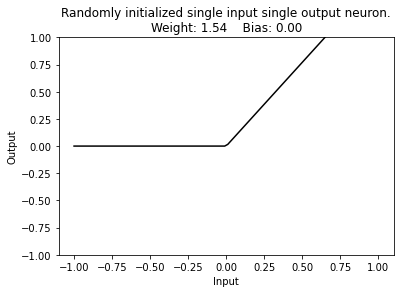

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[1], activation='relu')
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.plot(x, y, '-k')
plt.ylim(-1, 1)
plt.xlabel("Input")
plt.ylabel("Output")
w, b = model.get_weights()
plt.title("Randomly initialized single input single output neuron.\n" + f"Weight: {w[0][0]:.2f}    Bias: {b[0]:.2f}");

In [ ]:
models = []
lyer = [layers.Dense(units=32, activation='relu'),]

for i in range(5):
    model = keras.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=[1]))
    for _ in range(i):
        model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=1))
    models.append(model)

for m in models:
    m.compile(
        loss='mae',
        optimizer='adam'
    )


In [ ]:
total_epoch = 0
epochs_per_run = 1
for idx in range(70):
    total_epoch += epochs_per_run
    fig, axs = plt.subplots(5, figsize=(8, 12))
    fig.suptitle(f"Epoch {total_epoch}", fontsize=16)
    for i, model in enumerate(models):
        
        model.fit(
            x, nonlin,
            epochs=epochs_per_run
        )   
        axs[i].plot(x, nonlin, ',')
        axs[i].plot(x, model.predict(x))
        axs[i].set_title(f"{i+1} Layers")
        axs[i].set_ylim(-1.5, 1.5)
        axs[i].set_xlim(-10, 10)
        axs[i].axis('off')

    plt.tight_layout()
    fig.savefig(f"figures/epoch{total_epoch}.png")
    plt.close(fig=fig)

32/32 [==============================] - 0s 2ms/step - loss: 0.4049


In [ ]:
import imageio
import os
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

images = []
filenames = [x for x in os.listdir("figures") if x.startswith('epoch')]
filenames.sort(key=natural_keys)
with imageio.get_writer('figures/training.gif', mode='I') as writer:
    for fn in filenames:
        image = imageio.imread("figures/"+fn)
        writer.append_data(image)